In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Read file
df = pd.read_csv('WorldSustainabilityDataset.csv')
df.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [56]:
# Get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 54 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Country Name                                                                                  3287 non-null   object 
 1   Country Code                                                                                  3287 non-null   object 
 2   Year                                                                                          3287 non-null   int64  
 3   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      3193 non-null   float64
 4   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG              2566 non-null   float64
 5   Adjusted net savings, exclu

In [57]:
# keep only the columns we are interested in
cols_to_keep=[0,2,19,26,30,31,32,34,36,41,49]
df=df.iloc[:,cols_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Country Name                                                                         3287 non-null   object 
 1   Year                                                                                 3287 non-null   int64  
 2   GDP per capita (current US$) - NY.GDP.PCAP.CD                                        3246 non-null   float64
 3   Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS       3062 non-null   float64
 4   School enrollment, preprimary (% gross) - SE.PRE.ENRR                                2349 non-null   float64
 5   School enrollment, primary (% gross) - SE.PRM.ENRR                                   2783 

In [58]:
# shorten certain column names to make it easier for coding later
new_col_names = {'Country Name': 'Country', 
                 'GDP per capita (current US$) - NY.GDP.PCAP.CD': 'GDP Per Capita',
                 'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS': '% Women in Parliament',
                'School enrollment, preprimary (% gross) - SE.PRE.ENRR': 'PrePrimary School Enrolled%',
                 'School enrollment, primary (% gross) - SE.PRM.ENRR': 'Primary School Enrolled%',
                'School enrollment, secondary (% gross) - SE.SEC.ENRR': 'Secondary School Enrolled%',
                'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX': 'Women Business and the Law Index',
               'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1': '% in Poverty',
                'Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2':'Women Unemployment Rate%',
                'Regime Type (RoW Measure Definition)':'Regime',
                'Rural population (% of total population) - SP.RUR.TOTL.ZS':'Rural Population%'}
df=df.rename(columns=new_col_names)
df.head()

,Country,Year,GDP Per Capita,% Women in Parliament,PrePrimary School Enrolled%,Primary School Enrolled%,Secondary School Enrolled%,Women Business and the Law Index,% in Poverty,Women Unemployment Rate%,Regime
0,Aruba,2000,20617.75047,NaN,95.903038,110.788178,96.516167,NaN,NaN,NaN,NaN
1,Aruba,2001,20670.36701,NaN,97.550194,109.440964,97.972870,NaN,NaN,NaN,NaN
2,Aruba,2002,20436.88713,NaN,98.435913,111.010834,100.520683,NaN,NaN,NaN,NaN
3,Aruba,2003,20833.97636,NaN,99.622902,109.214302,99.091171,NaN,NaN,NaN,NaN
4,Aruba,2004,22568.37499,NaN,98.746521,110.839050,97.252441,NaN,NaN,NaN,NaN


In [59]:
#Start cleaning data
#Check duplicates
#check NaNs
print(df.duplicated().value_counts())
print(df.isna().sum())
#There are no duplicates but a lot of missing datas! will need to deal with them when we perform analysis

False    3287
dtype: int64
Country                                0
Year                                   0
GDP Per Capita                        41
% Women in Parliament                225
PrePrimary School Enrolled%          938
Primary School Enrolled%             504
Secondary School Enrolled%           857
Women Business and the Law Index      76
% in Poverty                        1983
Women Unemployment Rate%            1481
Regime                               211
dtype: int64


In [60]:
#which years do we have the data for?
print(df['Year'].unique())

#To investigate crosssectional relationships, we'll look at the latest year (2018) data only. 
df2018=df.loc[df['Year']==2018]
print(df2018.info())

# The first three relationships we are interested in are: 
#1. GDP per Capita and % Women in Parliament by country
#2. Group the countries by regime and compare women's rights/status/employment for each regime
#3. PrePrimary School Encorlled % and Women Unemployment Rate % and Women Business and the Law Index
# To keep only the relevant columns and drop countries/rows with missing values in those columns:
df2018_1=df2018.iloc[:,[0,2,3,4,7,9,10]].dropna().sort_values(by='GDP Per Capita',ascending=False)
print(df2018_1.info())
print(df2018_1.head())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 18 to 3286
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           173 non-null    object 
 1   Year                              173 non-null    int64  
 2   GDP Per Capita                    169 non-null    float64
 3   % Women in Parliament             168 non-null    float64
 4   PrePrimary School Enrolled%       121 non-null    float64
 5   Primary School Enrolled%          129 non-null    float64
 6   Secondary School Enrolled%        112 non-null    float64
 7   Women Business and the Law Index  169 non-null    float64
 8   % in Poverty                      64 non-null     float64
 9   Women Unemployment Rate%          102 non-null    float64
 10  Regime                            

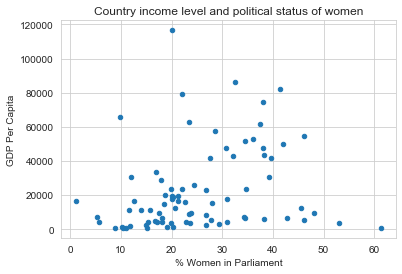

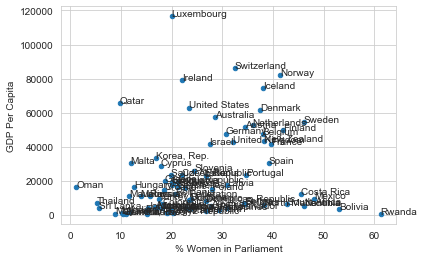

In [61]:
#Plot 1. GDP per Capita and % Women in Parliament by country
ax = df2018_1.plot(kind='scatter',x='% Women in Parliament',y='GDP Per Capita')
ax.set_title('Country income level and political status of women')

# It doesn't look like there is an obvious correlation between the two numbers through simple visualisation.
# Perhaps surprisingly, countries with high income level doesn't necessarily translate to higher women participation in politics 
# it would be nice to see which country each dot represents? especially the outliners
axlabel = df2018_1.plot(kind='scatter',x='% Women in Parliament',y='GDP Per Capita')
df2018_1[['% Women in Parliament','GDP Per Capita','Country']].apply(lambda row: axlabel.text(*row),axis=1);

['Liberal Democracy', 'Closed Autocracy', 'Electoral Democracy', 'Electoral Autocracy']


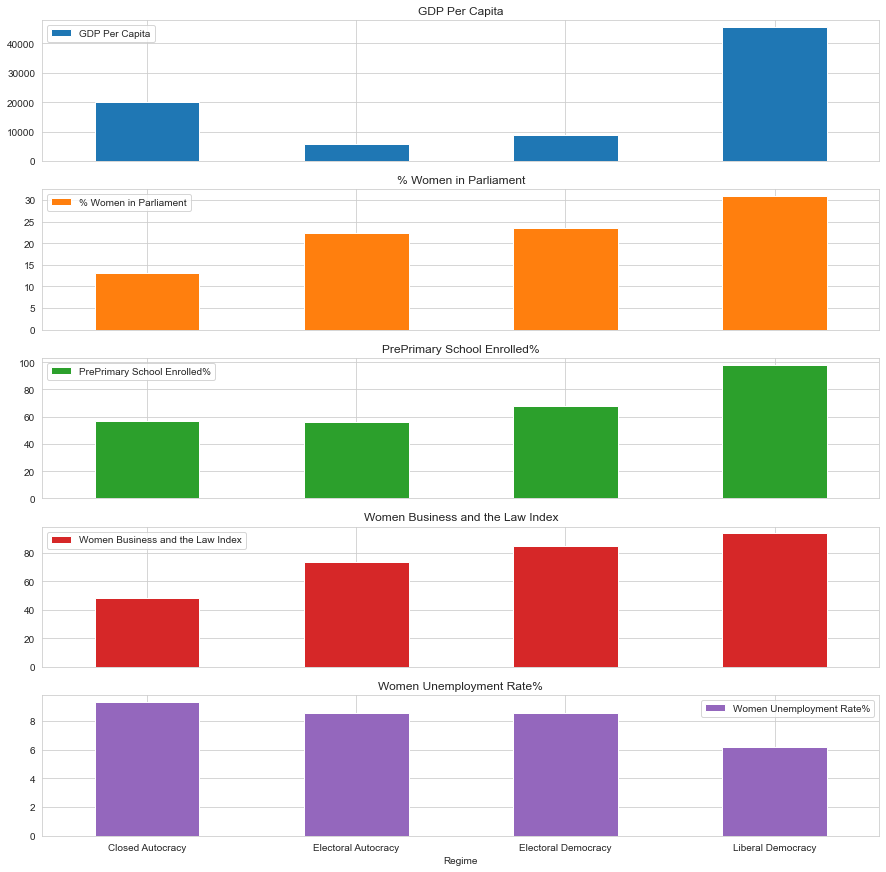

In [62]:
# Plot 2. Group the countries by regime, and compare the various indicators
regimelist=list(df2018_1['Regime'].unique())
print (regimelist)
dfregime=df2018_1.groupby('Regime')

#Comparing the variables by regime
dfregime.agg('mean')

#plot the above in graph to better visualise the data
axes = dfregime.agg('mean').plot.bar(rot=0, subplots=True, figsize =(15,15))

#On average Liberal Democracy countries are the richest and have the highest female representation and lowest female unemployment rate.


In [63]:
#We can check which countries sit in each regime group
for regime in regimelist:
    print(regime, "countries:", dfregime.get_group(regime).loc[:, 'Country'])
    
# We notice that some large countries such as China and Japan are not included, due to missing data. 
#To perform a more complete analysis, ideally we need to source the missing data of these countries. 

Liberal Democracy countries: 1842        Luxembourg
569        Switzerland
2298            Norway
1424           Ireland
1481           Iceland
3134     United States
873            Denmark
151          Australia
2811            Sweden
2279       Netherlands
170            Austria
1044           Finland
835            Germany
227            Belgium
2336       New Zealand
1120    United Kingdom
1500            Israel
1082            France
1671       Korea, Rep.
987              Spain
797             Cyprus
2792          Slovenia
2488          Portugal
816     Czech Republic
1006           Estonia
3115           Uruguay
1861            Latvia
455           Barbados
588              Chile
759         Costa Rica
Name: Country, dtype: object
Closed Autocracy countries: 2545           Qatar
2621    Saudi Arabia
2355            Oman
2925        Thailand
1557          Jordan
3210         Vietnam
Name: Country, dtype: object
Electoral Democracy countries: 2032                 Malta
1234       

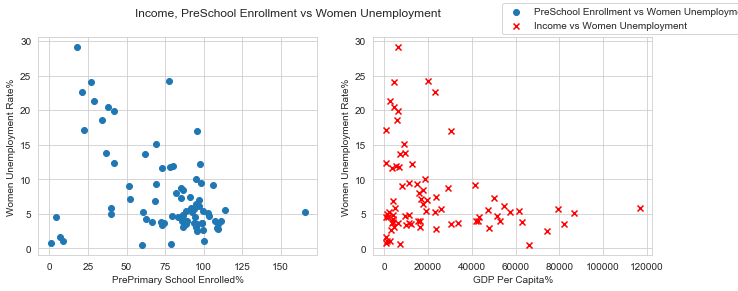

In [64]:
#Plot 3: we also want to see if there is a relationship between GDP Per Capita, PrePrimary School Encorlled % and Women Unemployment Rate %. 
#Our hypothesis is that higher income level, better early childcare provisions should lead to higher female employment
x1=df2018_1['PrePrimary School Enrolled%']
x2=df2018_1['GDP Per Capita']
y=df2018_1['Women Unemployment Rate%']

# Create the plot
fig, (ax1, ax2) = plt.subplots(figsize=(11,4), ncols=2)

ax1.scatter(x1, y)
ax1.set_xlabel('PrePrimary School Enrolled%')
ax1.set_ylabel('Women Unemployment Rate%')

ax2.scatter(x2, y, color='red', marker='x')
ax2.set_xlabel('GDP Per Capita%')
ax2.set_ylabel('Women Unemployment Rate%')

fig.suptitle("Income, PreSchool Enrollment vs Women Unemployment", fontsize=12, x=0.44)
fig.legend(labels=["PreSchool Enrollment vs Women Unemployment", "Income vs Women Unemployment"], loc=(.68, .88));

#The graphs below do appear to support our hypothesis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 37 to 379
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                64 non-null     object 
 1   % Women in Parliament  64 non-null     float64
 2   % in Poverty           64 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
None
           Country  % Women in Parliament  % in Poverty
37          Angola              30.454545          49.9
2697  Sierra Leone              12.328767          43.0
2241       Nigeria               5.555556          39.1
1310      Honduras              21.093750          15.8
1709       Lao PDR              27.516779          10.0


,Country,% Women in Parliament,% in Poverty
37,Angola,30.454545,49.9
2697,Sierra Leone,12.328767,43.0
417,Bolivia,53.076923,4.9


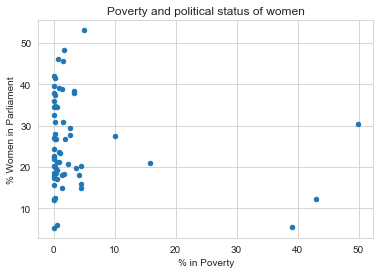

In [65]:
# Another question I want to investigate:is the political status of women worse in countries with high % population in poverty? 
#The relevant columns are % in Poverty and % Women in Parliament
df2018_2=df2018.iloc[:,[0,3,8]].dropna().sort_values(by='% in Poverty',ascending=False)
print(df2018_2.info())
print(df2018_2.head())
ax3 = df2018_2.plot(kind='scatter',x='% in Poverty',y='% Women in Parliament')
ax3.set_title('Poverty and political status of women')
# What can we learn from the graph? 
#First, there are a big cluster of data on the left as most countries have <10% in Poverty
#Second, between 0-40% poverty level, there seems to be a drop in %Women in Parliment as %Poverty goes up. 
#Third,it's not when poverty level is close to 0%.
#There are some obvious outliners - which countries are those?
df2018_2.loc[(df2018_2['% in Poverty']>40)|(df2018_2['% Women in Parliament']>50)]

In [66]:
#Now that we have finished investigating the cross-country 2018 data, let's investigate some time series data
#We are interested in the relationship between 1)economic development and 2)improvement in women's economic and political opportunities
#The relevant columns are GDP Per Capita, % in Poverty, and Women Business and the Law Index. However A lot of % poverty data are missing so we decided to focus on GDP as a measurement of economic development.
print(df.info())

#To investigate the relationship between GDP growth and the Women Business and the Law index, we need the changes in these values year on year.
# We want to focus on the top three fastest growing countries from 2000-2018. We need to identify these countries.

def calculate_gdp_growth(dfi):
    dfi['start_gdp'] = dfi['GDP Per Capita'].iloc[0]
    dfi['end_gdp'] = dfi['GDP Per Capita'].iloc[-1]
    dfi['GDP 2000-2018 Growth'] = dfi['end_gdp'] / dfi['start_gdp']
    dfi['GDP Previous Year']=dfi['GDP Per Capita'].shift(1)
    dfi['GDP YoY Change']=dfi['GDP Per Capita']/dfi['GDP Previous Year']-1
    dfi['WBLI Previous Year'] = dfi['Women Business and the Law Index'].shift(1)
    dfi['WBLI YoY Change']=dfi['Women Business and the Law Index']-dfi['WBLI Previous Year']
    return dfi

df2=df.iloc[:,[0,1,2,7]].sort_values(['Country','Year'],ascending=(True,True)).groupby('Country').apply(calculate_gdp_growth).reset_index(drop=True)
print(df2.head())
print(df2.info())

top3val=list(df2.loc[df['Year']==2018]['GDP 2000-2018 Growth'].nlargest(n=3))
print(top3val)

top3countries=list(df2[ (df2['Year'] == 2018) & (df2['GDP 2000-2018 Growth'].isin(top3val)) ]['Country'])
print (top3countries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           3287 non-null   object 
 1   Year                              3287 non-null   int64  
 2   GDP Per Capita                    3246 non-null   float64
 3   % Women in Parliament             3062 non-null   float64
 4   PrePrimary School Enrolled%       2349 non-null   float64
 5   Primary School Enrolled%          2783 non-null   float64
 6   Secondary School Enrolled%        2430 non-null   float64
 7   Women Business and the Law Index  3211 non-null   float64
 8   % in Poverty                      1304 non-null   float64
 9   Women Unemployment Rate%          1806 non-null   float64
 10  Regime                            3076 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 282.6+ KB
None
   Co

In [67]:
# Now we define a new dataframe with only these three countries and the two variables we are interested in.
df3 = df2[df2['Country'].isin(top3countries)].reset_index(drop=True)
df3.head()

,Country,Year,GDP Per Capita,Women Business and the Law Index,start_gdp,end_gdp,GDP 2000-2018 Growth,GDP Previous Year,GDP YoY Change,WBLI Previous Year,WBLI YoY Change
0,China,2000,959.372484,62.5,959.372484,9976.677137,10.39917,NaN,NaN,NaN,NaN
1,China,2001,1053.108243,62.5,959.372484,9976.677137,10.39917,959.372484,0.097705,62.5,0.0
2,China,2002,1148.508290,65.0,959.372484,9976.677137,10.39917,1053.108243,0.090589,62.5,2.5
3,China,2003,1288.643252,65.0,959.372484,9976.677137,10.39917,1148.508290,0.122015,65.0,0.0
4,China,2004,1508.668098,70.0,959.372484,9976.677137,10.39917,1288.643252,0.170741,65.0,5.0


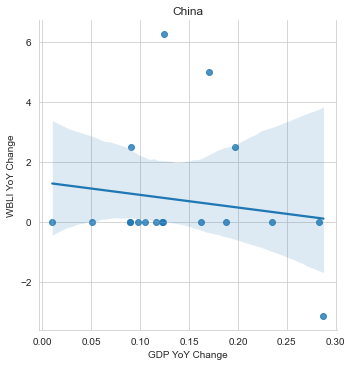

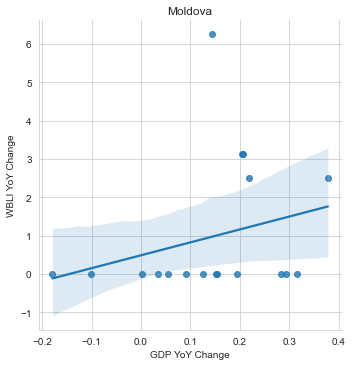

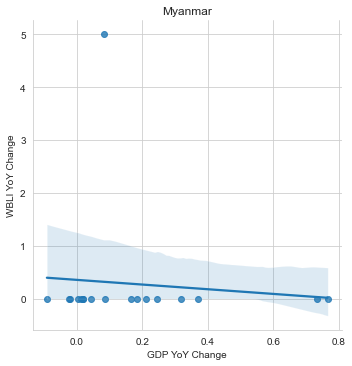

In [68]:
#Now let's run to run some regression lines of the two variables per country
import seaborn as sns

for i in df3['Country'].unique():
    sns.set_style('whitegrid')
    sns.lmplot(x ='GDP YoY Change', y ='WBLI YoY Change', data = df3.loc[df3['Country']==i]).set(title=i)

#It doesn't seem like there is an obvious linear relationship between the two changes! 

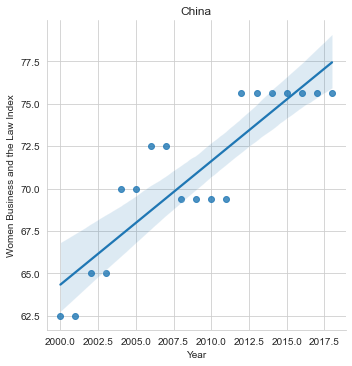

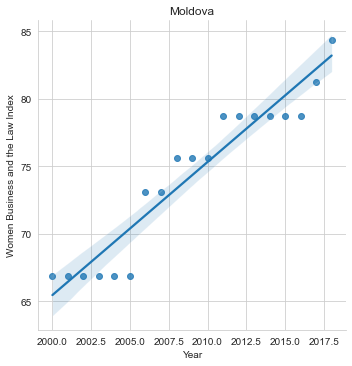

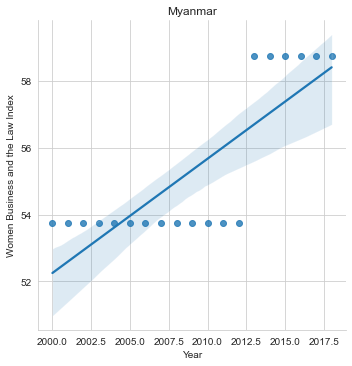

In [69]:
#Let's explore the line plots of the WBLI:
for i in df3['Country'].unique():
    sns.lmplot(x ='Year', y ='Women Business and the Law Index', data = df3.loc[df3['Country']==i]).set(title=i)

#The data is not continuous which might have resulted in the strange regression plots above. 
#In general though, these three countires that experienced strong economic growth also saw an improvement in Women's status

## 